In [98]:
import pandas as pd
import numpy as np
from sklearn import tree, linear_model


In [2]:
train_og = pd.read_csv('train_PreFer.csv')
outcome_og = pd.read_csv('PreFer_train_outcome.csv')
test_og = pd.read_csv('test_PreFer.csv')

/tmp/ipykernel_1675278/464636281.py:1: DtypeWarning: Columns (2584,2585,2586,2587,2588,2589,2590,4362,4364,4375,4388,4390,4401,5216,5217,5220,5221,5615,5616,5622,5623,5629,5630,5636,5637,5789,5792,5793,5794,5795,5797,6395,6396,6397,6398,6399,6400,6401,6402,6403,6404,6620,6621,6622,6623,6624,6625,6626,6629,6630,6631,6633,6634,6635,6636,6639,6642,6643,6644,6646,6647,6648,6649,6650,6651,6652,6655,6656,6657,6659,6660,6661,6662,6665,6668,6669,6670,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,7065,7066,7067,7068,7069,7070,7071,7072,7073,7074,7075,7164,7165,7166,7167,7168,7169,7170,7171,7172,7173,7409,7410,7411,7412,7413,7414,7415,7416,7417,7418,7419,7421,8819,8820,8821,8822,8823,8824,8825,8826,8827,8828,8829,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000,10068,10081,10094,10096,10103,10107,10109,10116,10341,10343,10344,10345,10737,10738,10739,10740,10741,10742,10743,10744,10745,10746,10747,10748,10749,11897,11898,11899,11900,11901,11902,11903,11904,11905,11906,11907,11908,

In [67]:
# only keep ones with outcome available
train = train_og[train_og['outcome_available'] == 1]
test = test_og[test_og['outcome_available'] == 1]
# delete first column (just an index)
train = train.drop(train.columns[0], axis = 1)
test = test.drop(test.columns[0], axis = 1)
# drop empty entries in outcome table, merge
outcome = outcome_og.dropna()
train = pd.merge(train, outcome, on = 'nomem_encr', how = 'inner')
test = pd.merge(test, outcome, on = 'nomem_encr', how = 'inner')
# tables dropping columns missing more than half of data
train_drop = train.dropna(axis = 1, thresh = len(train)/2)
test_drop = test[train_drop.columns]

In [68]:
# fill all empty entries with -1, no filtering
train_min1 = train.fillna(-1)
test_min1 = test.fillna(-1)
# drop all columns missing more than half of data, fill all empty with -1
train_DropMin1 = train_drop.fillna(-1)
test_DropMin1 = test_drop.fillna(-1)
# fill all empty entries by setting equal to last observed value (or next observed if no last observed)
train_last = train.bfill(axis = 1).ffill(axis = 1)
test_last = test.bfill(axis = 1).ffill(axis = 1)
# drop all columns missing more thna half of data, fill empty entries by setting equal to last observed value (or next observed if no last observed)
train_droplast = train_drop.bfill(axis = 1).ffill(axis = 1)
test_droplast = test_drop.bfill(axis = 1).ffill(axis = 1)

In [69]:
print(train_droplast.shape)
print(test_droplast.shape)

(796, 5021)
(191, 5021)


In [70]:
train_droplast.to_csv("train_dropped.csv", index=False)

In [71]:
outcome = train_droplast["new_child"]
test_outcome = test_droplast["new_child"]

train_without_outcome = train_droplast.drop(columns=["new_child"])
test_without_outcome = test_droplast.drop(columns=["new_child"])




In [72]:
non_numeric_columns = [col for col in train_without_outcome.columns if not pd.api.types.is_numeric_dtype(train_without_outcome[col])]
non_numeric_columns_test = [col for col in test_without_outcome.columns if not pd.api.types.is_numeric_dtype(test_without_outcome[col])]
non_numeric_columns = sorted(list(set(non_numeric_columns_test)) + list(set(non_numeric_columns)))
print(non_numeric_columns)
train_without_outcome = train_without_outcome.drop(columns=non_numeric_columns)
test_without_outcome = test_without_outcome.drop(columns=non_numeric_columns)

['ca16e066', 'ca16e067', 'ca16e068', 'ca16e069', 'ca16e070', 'ca16e071', 'ca16e071', 'ca16e072', 'ca16e072', 'ca16e073', 'ca16e073', 'ca16e074', 'ca16e074', 'ca18f066', 'ca18f067', 'ca18f068', 'ca18f069', 'ca18f070', 'ca18f070', 'ca18f071', 'ca18f071', 'ca18f072', 'ca18f072', 'ca18f073', 'ca18f073', 'ca18f074', 'ca18f074', 'ca20g062', 'ca20g066', 'ca20g067', 'ca20g068', 'ca20g069', 'ca20g070', 'ca20g070', 'ca20g071', 'ca20g071', 'ca20g072', 'ca20g072', 'ca20g073', 'ca20g073', 'ca20g074', 'ca20g074', 'cd20m034', 'cd20m035', 'cd20m036', 'cd20m038', 'cd20m039', 'cd20m041', 'cd20m042', 'cd20m043', 'cd20m044', 'cd20m045', 'cd20m046', 'cd20m047', 'cd20m048', 'cd20m049', 'cd20m050', 'cd20m051', 'cd20m052', 'cd20m053', 'cd20m054', 'cd20m058', 'cd20m073', 'cd20m074', 'cd20m075', 'cd20m076', 'cd20m077', 'cd20m078', 'cd20m078', 'cd20m079', 'cd20m079', 'cd20m080', 'cd20m080', 'cd20m081', 'cd20m081', 'cf15h024', 'cf15h128', 'cf15h388', 'cf15h389', 'cf15h390', 'cf15h391', 'cf15h392', 'cf15h393', 'cf

In [73]:
test_cols = test_without_outcome.columns
train_cols = train_without_outcome.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
print(train_not_test)

Index([], dtype='object')


In [74]:
tree_regression = tree.DecisionTreeRegressor()
tree_regression = tree_regression.fit(train_without_outcome, outcome)


In [75]:
test_cols = test_without_outcome.columns
train_cols = train_without_outcome.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
print(train_not_test)


Index([], dtype='object')


[Text(0.59375, 0.96875, 'x[837] <= 0.5\nsquared_error = 0.172\nsamples = 796\nvalue = 0.22'),
 Text(0.3201530612244898, 0.90625, 'x[3016] <= 0.5\nsquared_error = 0.144\nsamples = 702\nvalue = 0.174'),
 Text(0.11564625850340136, 0.84375, 'x[3287] <= 1982.0\nsquared_error = 0.047\nsamples = 243\nvalue = 0.049'),
 Text(0.08843537414965986, 0.78125, 'x[3342] <= 8.5\nsquared_error = 0.03\nsamples = 227\nvalue = 0.031'),
 Text(0.07482993197278912, 0.71875, 'x[1768] <= 0.5\nsquared_error = 0.026\nsamples = 226\nvalue = 0.027'),
 Text(0.061224489795918366, 0.65625, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.08843537414965986, 0.65625, 'x[609] <= 3.5\nsquared_error = 0.022\nsamples = 225\nvalue = 0.022'),
 Text(0.05442176870748299, 0.59375, 'x[2686] <= 2507893.5\nsquared_error = 0.009\nsamples = 213\nvalue = 0.009'),
 Text(0.027210884353741496, 0.53125, 'x[2490] <= 38.0\nsquared_error = 0.005\nsamples = 211\nvalue = 0.005'),
 Text(0.013605442176870748, 0.46875, 'squared_error = 0

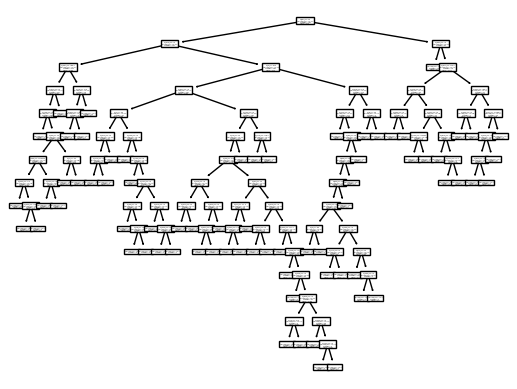

In [95]:
tree.plot_tree(tree_regression)

In [77]:
x = tree_regression.predict([train_without_outcome.iloc[40]])
print(x)

[0.]


/usr/licensed/anaconda3/2024.2/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [80]:
y_2 = tree_regression.predict(test_without_outcome)


In [81]:
print(y_2)

[0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]


In [82]:
print(test_outcome)

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
186    0.0
187    0.0
188    0.0
189    1.0
190    0.0
Name: new_child, Length: 191, dtype: float64


In [107]:
from sklearn.metrics import f1_score, accuracy_score
import random

In [91]:
print(f1_score(y_2, test_outcome, average='macro'))

0.6205298013245033


In [94]:
print(accuracy_score(y_2, test_outcome, normalize=True))

0.7486910994764397


In [101]:
lregression = linear_model.LogisticRegression(random_state=0, max_iter=1000).fit(train_without_outcome, outcome)

In [104]:
test_lregression = lregression.predict_proba(test_without_outcome)

In [105]:
print(test_lregression)

[[0.83306933 0.16693067]
 [0.86991473 0.13008527]
 [0.81473432 0.18526568]
 [0.82183836 0.17816164]
 [0.93922185 0.06077815]
 [0.81537664 0.18462336]
 [0.78110463 0.21889537]
 [0.70894291 0.29105709]
 [0.81678632 0.18321368]
 [0.81717162 0.18282838]
 [0.88813684 0.11186316]
 [0.77949682 0.22050318]
 [0.92757929 0.07242071]
 [0.84883606 0.15116394]
 [0.83254216 0.16745784]
 [0.83911123 0.16088877]
 [0.81169535 0.18830465]
 [0.7908249  0.2091751 ]
 [0.81685616 0.18314384]
 [0.75660401 0.24339599]
 [0.83263987 0.16736013]
 [0.82013982 0.17986018]
 [0.9306963  0.0693037 ]
 [0.74676188 0.25323812]
 [0.80035871 0.19964129]
 [0.83164644 0.16835356]
 [0.78690637 0.21309363]
 [0.38411016 0.61588984]
 [0.81229708 0.18770292]
 [0.81794587 0.18205413]
 [0.71980916 0.28019084]
 [0.82080896 0.17919104]
 [0.78140435 0.21859565]
 [0.91144218 0.08855782]
 [0.83176746 0.16823254]
 [0.83205126 0.16794874]
 [0.83223875 0.16776125]
 [0.83261368 0.16738632]
 [0.93649482 0.06350518]
 [0.76127487 0.23872513]


In [123]:
results = []
for p in test_lregression:
    r = random.random()
    if r > p[0]:
        results.append(1)
    else:
        results.append(0)

print(f"f1_score for logistic: {f1_score(results, test_outcome, average='macro')}")
print(f"accuracy score for logistic: {accuracy_score(results, test_outcome, normalize=True)}")

f1_score for logistic: 0.46944444444444444
accuracy score for logistic: 0.675392670157068


In [116]:
print(f"f1_score for logistic: {f1_score(results, test_outcome, average='macro')}")
print(f"accuracy score for logistic: {accuracy_score(results, test_outcome, normalize=True)}")

f1_score for logistic: 0.5236498108015136
accuracy score for logistic: 0.6963350785340314


In [127]:
import pickle
with open("tree_regression", "wb") as f:
    pickle.dump(tree_regression, f)
with open("lregression", "wb") as f:
    pickle.dump(lregression, f)